## 0. Load All Data in From CSV Documents

In [1]:
# package imports for clustering
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from ImageIOFunctions import LoadImageFromCSV
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

Training data is retrieved and stored from 6 csv documents, where each CSV document contains the data for an image on different channels (RGB) of the satellite image. These are then grouped to produce the x and y raw data.

In [2]:
filenames = ['1000_1000.csv','1000_2000.csv','1000_3000.csv','1000_4000.csv','1000_5000.csv','1000_6000.csv']

In [3]:
# image data red retrieval from csv
reddatafnames = [os.path.join(os.getcwd(),'data','red'+x) for x in filenames]
reddatalist = [LoadImageFromCSV(fname) for fname in reddatafnames]

# stack data vertically to produce raw image data array
redimage_structured = np.vstack(tuple(reddatalist))
raw_imagered = redimage_structured.flatten()

In [4]:
# image data blue retrieval from csv
bluedatafnames = [os.path.join(os.getcwd(),'data','blue'+x) for x in filenames]
bluedatalist = [LoadImageFromCSV(fname) for fname in bluedatafnames]

# stack data vertically to produce raw image data array
blueimage_structured = np.vstack(tuple(bluedatalist))
raw_imageblue = blueimage_structured.flatten()

In [5]:
# image data green retrieval from csv
greendatafnames = [os.path.join(os.getcwd(),'data','green'+x) for x in filenames]
greendatalist = [LoadImageFromCSV(fname) for fname in greendatafnames]

# stack data vertically to produce raw image data array
greenimage_structured = np.vstack(tuple(greendatalist))
raw_imagegreen = greenimage_structured.flatten()

In [6]:
# image data nir retrieval from csv
nirdatafnames = [os.path.join(os.getcwd(),'data','nir'+x) for x in filenames]
nirdatalist = [LoadImageFromCSV(fname) for fname in nirdatafnames]

# stack data vertically to produce raw image data array
nirimage_structured = np.vstack(tuple(nirdatalist))
raw_imagenir = nirimage_structured.flatten()

In [7]:
# label data retrieval from csv
labeldatafnames = [os.path.join(os.getcwd(),'data','label'+x) for x in filenames]
labeldatalist = [LoadImageFromCSV(fname) for fname in labeldatafnames]

# stack data vertically to produce raw label data array
labels_structured = np.vstack(tuple(labeldatalist))
raw_labels = labels_structured.flatten()

In [8]:
ndviimage_structured = (nirimage_structured - redimage_structured) / (nirimage_structured + redimage_structured + 0.00001)
raw_imagendvi = ndviimage_structured.flatten()

Quick sanity check using imshow to make sure that nothing funky happened with training data or label data

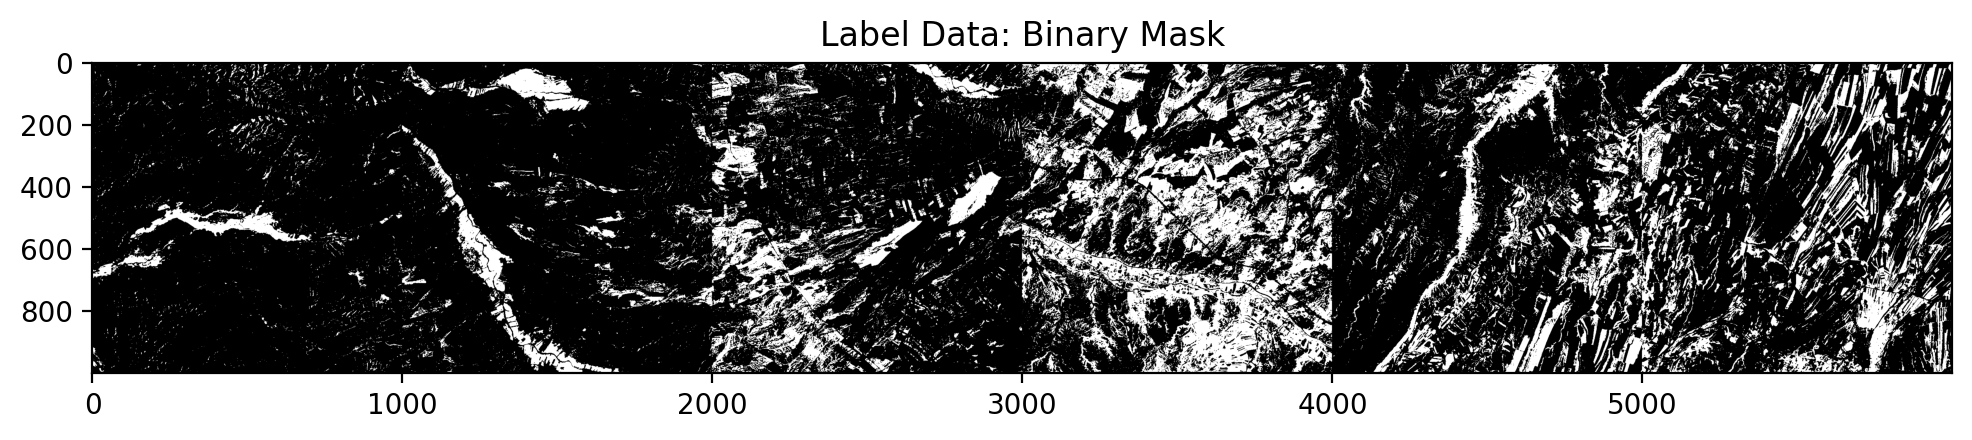

In [9]:
plt.imshow(labels_structured.T, cmap='gray')
plt.title('Label Data: Binary Mask')
plt.show()

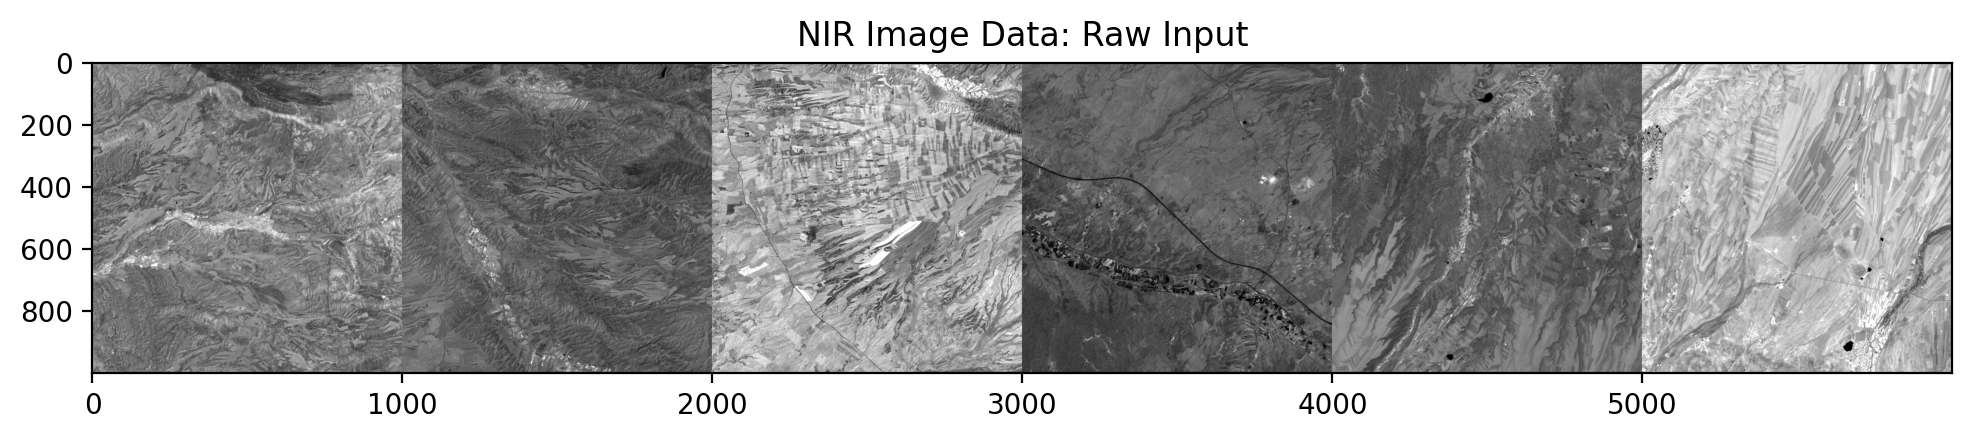

In [10]:
plt.imshow(nirimage_structured.T, cmap='gray')
plt.title('NIR Image Data: Raw Input')
plt.show()

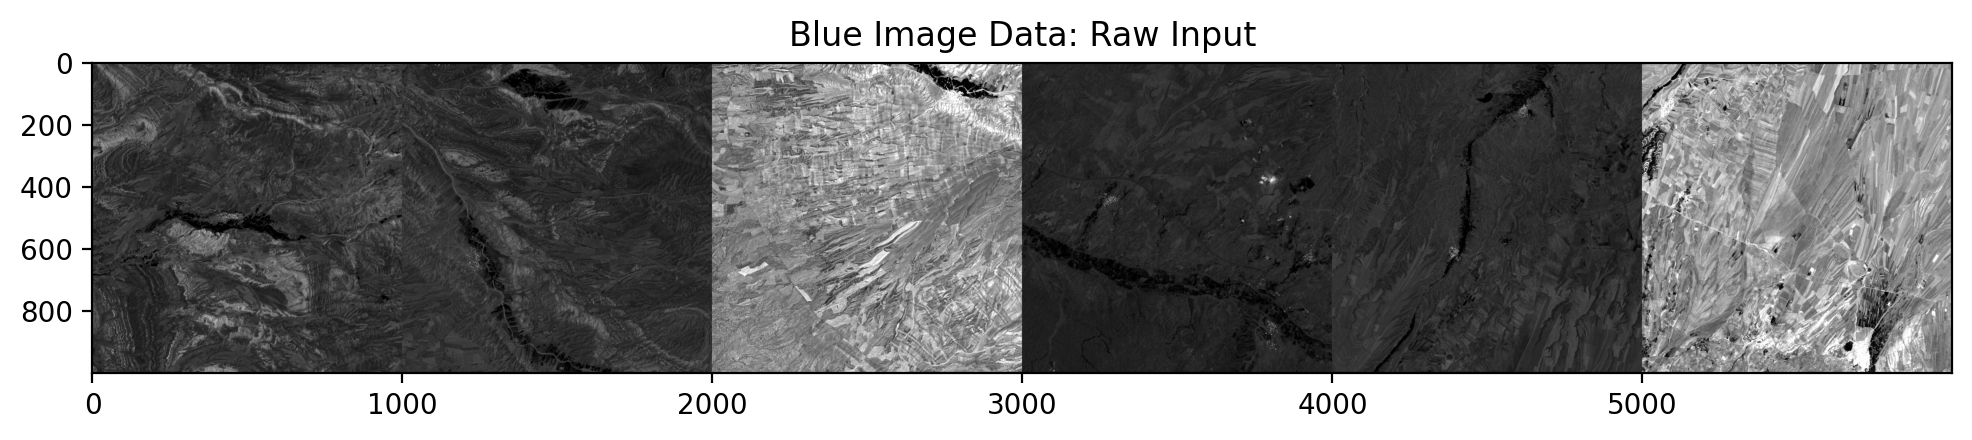

In [11]:
plt.imshow(blueimage_structured.T, cmap='gray')
plt.title('Blue Image Data: Raw Input')
plt.show()

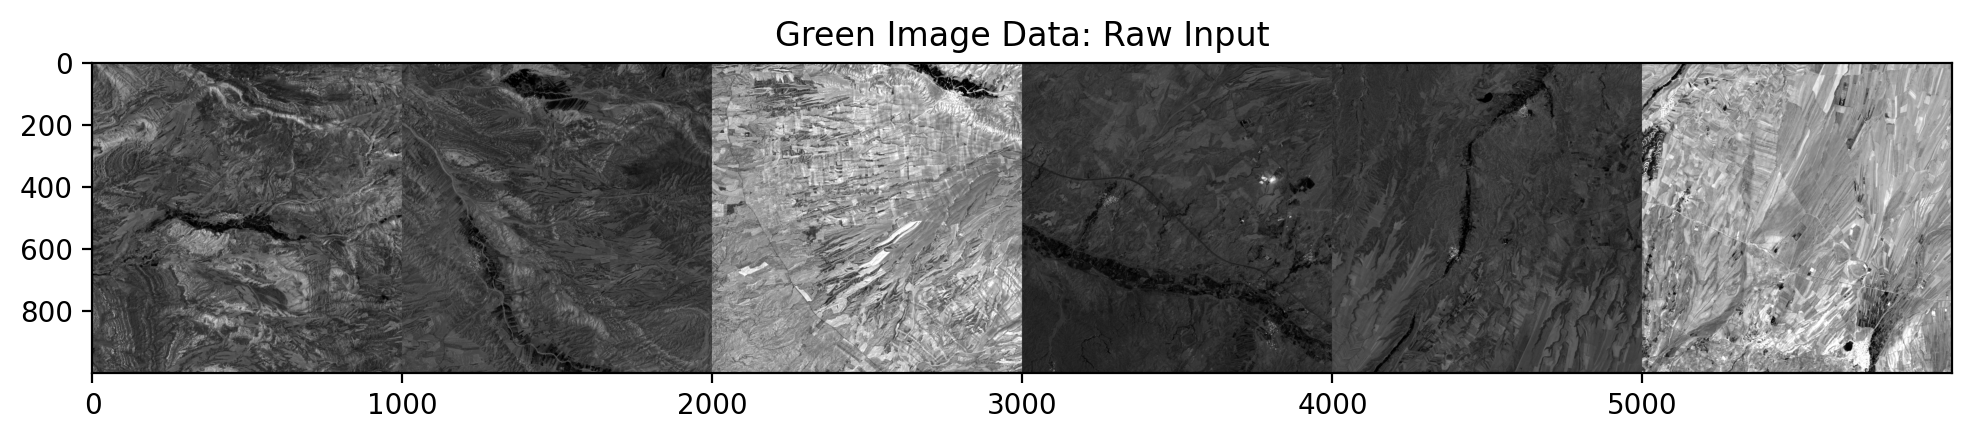

In [12]:
plt.imshow(greenimage_structured.T, cmap='gray')
plt.title('Green Image Data: Raw Input')
plt.show()

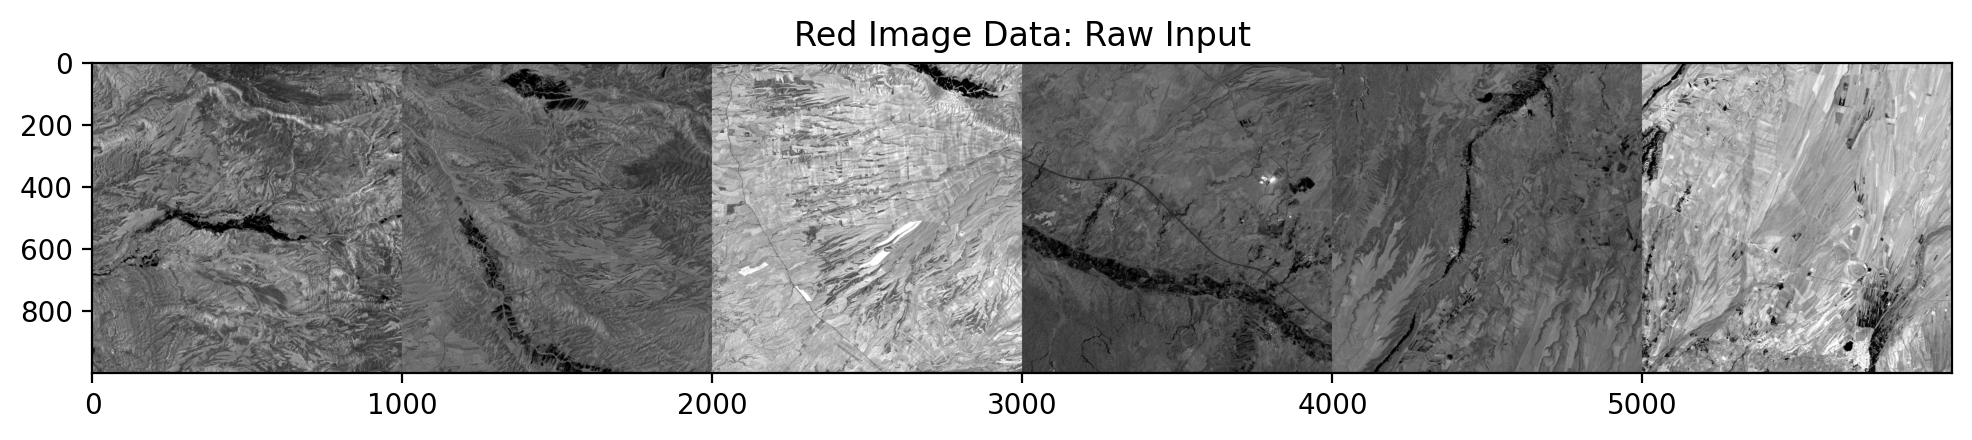

In [11]:
plt.imshow(redimage_structured.T, cmap='gray')
plt.title('Red Image Data: Raw Input')
plt.show()

Next, the csv data must be collapsed and converted to record data, with shape (n_samples, n_features), with the label data structured as (n_samples).

In [14]:
# import train test split function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# collapse and collect input channels and store as record array
raw_image = np.vstack((raw_imagered,raw_imagegreen,raw_imageblue,raw_imagenir,raw_imagendvi,raw_labels)).T

stratified = 1000000
farm =[]
no_farm = []
#serparte based upon raw label
for x in raw_image:
    if x[5] == 0:
        no_farm.append(x)
    else:
        farm.append(x)
#convert to npstack
print(len(farm))
print(len(no_farm))
farmstack = np.vstack(tuple(farm))
nofarmstack = np.vstack(tuple(no_farm))


# np.random.choice only works with 1-d arrays so this is neccessary to get index for sample list 2nd argument of np.random.choice
# can be changed to select different sample sizes. 
indicesfarm = np.random.choice(farmstack.shape[0], stratified, replace=False)
randomfarm = farmstack[indicesfarm]


indicesnofarm = np.random.choice(nofarmstack.shape[0], stratified, replace=False)
randomnofarm = nofarmstack[indicesnofarm]


# Get rid of label column
randomfarm = randomfarm[:,[0,1,2,3,4]]
randomnofarm = randomnofarm[:,[0,1,2,3,4]]

# THESE ARE NOT GUARANTEED TO BE CORRECT LABELS OF POINTS JUST AN EVEN WAY OF SPLITTING SO I CAN GET THIS THING TO WORK AT ALL
# FARM LABELED POINTS

# Seperate data back out??? I am just matching the example henry wrote. 

randred = []
randgreen = []
randblue = []
randnir = []
randndvi = []
count = 0
for x in randomfarm:
    for y in range(len(x)):
        if y == 0:
            randred.append(randomfarm[count][y])
        elif y == 1:
            randgreen.append(randomfarm[count][y])
        elif y == 2:
            randblue.append(randomfarm[count][y])
        elif y == 3:
            randnir.append(randomfarm[count][y])
        elif y == 4:
            randndvi.append(randomfarm[count][y])
    count += 1


randredstack = np.vstack(tuple(randred))
rawrandred = randredstack.flatten()

randgreenstack = np.vstack(tuple(randgreen))
rawrandgreen = randgreenstack.flatten()

randbluestack = np.vstack(tuple(randblue))
rawrandblue = randbluestack.flatten()

randnirstack = np.vstack(tuple(randnir))
rawrandnir = randnirstack.flatten()

randndvistack = np.vstack(tuple(randndvi))
rawrandndvi = randndvistack.flatten()

raw_steak = np.vstack((rawrandred,rawrandgreen,rawrandblue,rawrandnir,rawrandndvi)).T
##############################################################THIS IS A NIGHTMARE I KNOW #######################################
# NON FARM LABELED POINTS
norandred = []
norandgreen = []
norandblue = []
norandnir = []
norandndvi = []

# Seperate data back out??? I am just matching the example henry wrote. 
count2 = 0
for x in randomnofarm:
    for y in range(len(x)):
        if y == 0:
            norandred.append(randomnofarm[count2][y])
        elif y == 1:
            norandgreen.append(randomnofarm[count2][y])
        elif y == 2:
            norandblue.append(randomnofarm[count2][y])
        elif y == 3:
            norandnir.append(randomnofarm[count2][y])
        elif y == 4:
            norandndvi.append(randomnofarm[count2][y])
    count2 += 1


norandredstack = np.vstack(tuple(norandred))
norawrandred = norandredstack.flatten()

norandgreenstack = np.vstack(tuple(norandgreen))
norawrandgreen = norandgreenstack.flatten()

norandbluestack = np.vstack(tuple(norandblue))
norawrandblue = norandbluestack.flatten()

norandnirstack = np.vstack(tuple(norandnir))
norawrandnir = norandnirstack.flatten()

norandndvistack = np.vstack(tuple(norandndvi))
norawrandndvi = norandndvistack.flatten()

noraw_steak = np.vstack((norawrandred,norawrandgreen,norawrandblue,norawrandnir,norawrandndvi)).T

###########################################################################################################################
# Equivelant to raw image
final_steak = np.vstack((raw_steak,noraw_steak))
lollabels = []
for x in range(stratified):
    lollabels.append(1.0)
for x in range(stratified):
    lollabels.append(0.0)
lollabels_structured = np.vstack(tuple(lollabels))
# Eauivelant to raw_labels
steak_labels = lollabels_structured.flatten()


# # perform train test split
image_train, image_test, label_train, label_test = train_test_split(final_steak, steak_labels, test_size=0.2)

1192478
4807522


## 1. Implement Clustering Algorithms

In [15]:
# clustering imports
from sklearn.cluster import MeanShift, MiniBatchKMeans, KMeans

The k-means algorithm will first be implemented, where the characteristics of each pixel in a channel is used to cluster pixels into two clusters (farmland and nonfarmland)

In [16]:
# generate and fit K-means object on image data
km_cluster = KMeans(n_clusters=2, random_state=5).fit(final_steak)
# store predicted cluster values for K-means
km_predicted = 1 - km_cluster.predict(final_steak)

A more robust K-means algorithm will also be used to attempt to cluster image data into two clusters of similar characteristics.

In [17]:
# generate and fit K-means object on image data
mbkm_cluster = MiniBatchKMeans(n_clusters=2, random_state=5).fit(final_steak)
# store predicted cluster values for K-means
mbkm_predicted = 1 - mbkm_cluster.predict(final_steak)

The birch algorithm will also be used for clustering, using a cluster merging procedure.

In [18]:
###
#    OUR DATASET IS TOO BIG, SO THIS DOESN'T WORK
###

# generate and fit K-means object on image data
# spec_cluster = MeanShift().fit(raw_image)
# store predicted cluster values for K-means
# spec_predicted = spec_cluster.predict(raw_image)

## 2. Implement Supervised Algorithms

In [19]:
# model imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
# package imports for clustering and modeling performance
from sklearn.metrics import accuracy_score, f1_score

In [20]:
# make accuracy dictionary
model_accuracy = {}

First, use decision tree classifier to categorize data.

In [21]:
# generate and fit decision tree classifier
dt = DecisionTreeClassifier(random_state=5).fit(image_train, label_train)
# store decision tree prediction values for validation
dt_predicted = dt.predict(image_test)
dt_accuracy = accuracy_score(label_test,dt_predicted)
dt_f1 = f1_score(label_test,dt_predicted)

Next, a multilayer perceptron network.

In [22]:
# generate and fit decision tree classifier
mlp = MLPClassifier(max_iter=2,random_state=5).fit(image_train, label_train)
# store decision tree prediction values for validation
mlp_predicted = mlp.predict(image_test)
mlp_accuracy = accuracy_score(label_test,mlp_predicted)
mlp_f1 = f1_score(label_test,mlp_predicted)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


Next, Bernoulli Naive Bayes model.

In [23]:
# generate and fit decision tree classifier
bnb = BernoulliNB().fit(image_train, label_train)
# store decision tree prediction values for validation
bnb_predicted = bnb.predict(image_test)
bnb_accuracy = accuracy_score(label_test,bnb_predicted)
bnb_f1 = f1_score(label_test,bnb_predicted)

Next, Gaussian Naive Bayes model.

In [24]:
# generate and fit decision tree classifier
gnb = GaussianNB().fit(image_train, label_train)
# store decision tree prediction values for validation
gnb_predicted = gnb.predict(image_test)
gnb_accuracy = accuracy_score(label_test,gnb_predicted)
gnb_f1 = f1_score(label_test,gnb_predicted)

Stochastic Gradient Descent Classifier

In [25]:
# generate and fit decision tree classifier
sgdc = SGDClassifier().fit(image_train, label_train)
# store decision tree prediction values for validation
sgdc_predicted = sgdc.predict(image_test)
sgdc_accuracy = accuracy_score(label_test,sgdc_predicted)
sgdc_f1 = f1_score(label_test,sgdc_predicted)

Ridge classifier

In [26]:
# generate and fit decision tree classifier
ridgec = RidgeClassifier().fit(image_train, label_train)
# store decision tree prediction values for validation
ridgec_predicted = ridgec.predict(image_test)
ridgec_accuracy = accuracy_score(label_test,ridgec_predicted)
ridgec_f1 = f1_score(label_test,ridgec_predicted)

Random forest classifier

In [27]:
# generate and fit decision tree classifier
rfc = GaussianNB().fit(image_train, label_train)
# store decision tree prediction values for validation
rfc_predicted = rfc.predict(image_test)
rfc_accuracy = accuracy_score(label_test,rfc_predicted)
rfc_f1 = f1_score(label_test,rfc_predicted)

Adaboost classifier

In [28]:
# generate and fit decision tree classifier
abc = AdaBoostClassifier().fit(image_train, label_train)
# store decision tree prediction values for validation
abc_predicted = abc.predict(image_test)
abc_accuracy = accuracy_score(label_test,abc_predicted)
abc_f1 = f1_score(label_test,abc_predicted)

Gradient boosting classifier

In [29]:
# generate and fit decision tree classifier
gbc = GradientBoostingClassifier().fit(image_train, label_train)
# store decision tree prediction values for validation
gbc_predicted = gbc.predict(image_test)
gbc_accuracy = accuracy_score(label_test,gbc_predicted)
gbc_f1 = f1_score(label_test,gbc_predicted)

Voting classifier

In [30]:
# generate and fit decision tree classifier
vc = VotingClassifier(estimators=[('dt',dt),('mlp',mlp),('bnb',bnb),('rfc',rfc)], voting='soft').fit(image_train, label_train)
# store decision tree prediction values for validation
vc_predicted = vc.predict(image_test)
vc_accuracy = accuracy_score(label_test,vc_predicted)
vc_f1 = f1_score(label_test,vc_predicted)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


## 3. Assess performance of All Algorithms

In [31]:
# package imports for clustering and modeling performance
from sklearn.metrics import accuracy_score, f1_score

In [32]:
baseline_accuracy = accuracy_score(steak_labels, np.zeros_like(steak_labels))

In [33]:
print('K-means accuracy:\t\t',accuracy_score(steak_labels,km_predicted))
print('Minibatch K-means accuracy:\t',accuracy_score(steak_labels,mbkm_predicted))

K-means accuracy:		 0.522137
Minibatch K-means accuracy:	 0.5222965


In [34]:
print('Baseline model accuracy:\t',baseline_accuracy)
print('Decision tree accuracy:\t\t',dt_accuracy)
print('Multilayer perceptron accuracy:\t',mlp_accuracy)
print('Bernoulli NB accuracy:\t\t',bnb_accuracy)
print('Gaussian NB accuracy:\t\t',gnb_accuracy)
print('SGD classifier accuracy:\t',sgdc_accuracy)
print('Ridge classifier accuracy:\t',ridgec_accuracy)
print('Random forest accuracy:\t\t',rfc_accuracy)
print('AdaBoost accuracy:\t\t',abc_accuracy)
print('Gradient boost accuracy:\t',gbc_accuracy)
print('Voting classifier accuracy:\t',vc_accuracy)

Baseline model accuracy:	 0.5
Decision tree accuracy:		 0.785735
Multilayer perceptron accuracy:	 0.81838
Bernoulli NB accuracy:		 0.689415
Gaussian NB accuracy:		 0.6471025
SGD classifier accuracy:	 0.7522525
Ridge classifier accuracy:	 0.771705
Random forest accuracy:		 0.6471025
AdaBoost accuracy:		 0.8008775
Gradient boost accuracy:	 0.820275
Voting classifier accuracy:	 0.80067


In [35]:
print('Decision tree f1:\t\t',dt_f1)
print('Multilayer perceptron f1:\t',mlp_f1)
print('Bernoulli NB f1:\t\t',bnb_f1)
print('Gaussian NB f1:\t\t\t',gnb_f1)
print('SGD classifier f1:\t\t',sgdc_f1)
print('Ridge classifier f1:\t\t',ridgec_f1)
print('Random forest f1:\t\t',rfc_f1)
print('AdaBoost f1:\t\t\t',abc_f1)
print('Gradient boost f1:\t\t',gbc_f1)
print('Voting classifier f1:\t\t',vc_f1)

Decision tree f1:		 0.7860794121464443
Multilayer perceptron f1:	 0.8192089270693869
Bernoulli NB f1:		 0.7469724434306197
Gaussian NB f1:			 0.5309506325033976
SGD classifier f1:		 0.7479288495926376
Ridge classifier f1:		 0.7704020315289266
Random forest f1:		 0.5309506325033976
AdaBoost f1:			 0.8024406880557589
Gradient boost f1:		 0.8206587901889955
Voting classifier f1:		 0.7951313767710041
